<h3>Read in the dataset.</h3><br>
Importing appropriate libraries, setting Panda print options and reading in the file as a dataset.

In [1]:
# Import libraries

# Standard essential libraries

import pandas                  as pd                      # data science essentials
import matplotlib.pyplot       as plt                     # essential graphical output
import seaborn                 as sns                     # enhanced graphical outputimport pandas as pd
import statsmodels.formula.api as smf                     # regression modeling

# Train test split libraries

from   sklearn.model_selection import train_test_split    # train/test split

# KNeigbors libraries

from sklearn.neighbors import KNeighborsClassifier        # KNN for Classification
from   sklearn.preprocessing   import StandardScaler      # standard scaler

# Logistic regression and confusion matrix libraries

from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score

# Gradient Boosting classifier library

from sklearn.ensemble import GradientBoostingClassifier

# CART model packages

from sklearn.tree import DecisionTreeClassifier      # classification trees

# Confusion matrix

from sklearn.metrics import confusion_matrix   

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# Set pandas print options

pd.set_option('display.max_rows'   , 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width'      , 1000)

# Specify file name
original_df = 'Apprentice_Chef_Dataset.xlsx'


# Read the file into Python
chefdf = pd.read_excel(original_df)

C:\Users\matth\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<h3>Data exploration</h3><br>
Making the dataset visible in various way to explore the data

Previously, two methods were used for initial data exploration; chefdf.info() and chefdf.describe().
These main takeaways included that: 

NAME, EMAIL, FIRST_NAME, FAMILY_NAME were objects and could not be used for linear regression unless used as dummies. These variables may be more useful for our classification model. NAME, FIRST_NAME, FAMILY_NAME may not be the best indicators still, as this would imply that for instance everyone called "Bob" buys more, which obviously is absurd. *The extra data in this case may still represent a group of customers that maybe related to one another in a meaningful way. This group needs to be looked into before deleting all name variables.* - We can see for instance in the code below that some people are family of one another.

EMAIL may be a more interesting metric as we can clearly divide between corporate and private entities which could be very useful for our model.

**Displaying the head of chefdf for a quick oversight**

In [2]:
# displaying the head of the dataset

chefdf.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [3]:
# pulling up data dictionary
chef_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
chef_description

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...
2,NAME,string,Full name of customer (collected upon initial ...
3,EMAIL,string,Email of customer (collected upon initial regi...
4,FIRST_NAME,string,First name of customer (collected upon initial...
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...


Through the chefdf.head() code earlier we could see the pressence of corporate mails which my prove valueable for our model.

As we can see from the metadata CROSS_SELL_SUCCESS is literally linked to the success of our Halfway There campaign and thus requires further investigation.

Finally, there is a realization that now we are looking at predicting our CROSS_SELL_SUCCESS metric and this unlike previous cases where REVENUE was to be predicted, REVENUE is now a potentially valuable feature.

**Value counts and distribution plot to get an initial view in the metric that provides insight in evaluating the success of Halfway There**

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


Text(0.5, 0, 'CROSS_SELL_SUCCESS')

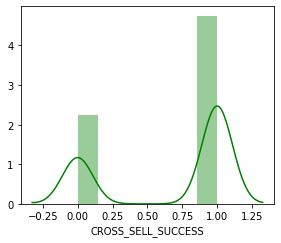

In [4]:
print(chefdf["CROSS_SELL_SUCCESS"].value_counts())

# Visual Evaluation

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

*We can already see that almost a third of our customers did not adopt Halfway There as a service. On the other hand we can clearly see that the majority did adopt it. Further insights are needed to determine whether or not the service was a succes.*

<h3>Missing value analysis</h3><br>

In [5]:
# Check column wise for missing values and then add the values together.

chefdf.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

**Flagging**

New columns with prefix 'm_' will are created in order to flag potential missing values.

In [6]:
#########################
# mv_flagger
#########################

def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values is called chefdf


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



# text split of missing names

def text_split_names(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        
#counting strings in names
text_split_names(col = 'NAME',
                   df  = chefdf)

**Implementing flagged values in dataset**

In [7]:
chefdf = mv_flagger(chefdf)
chefdf.head(5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,m_FAMILY_NAME
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,2,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,2,0
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,5,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,5,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,3,0


Family names have a high rate of missing values and could be considered to be imputed. As mentioned earlier Last names and first names, however, are not relevant when looking into predicting cross_sell_success as they are based on individuals rather than groups of customers and are likely not very good features for the model. Therefore both columns "First Name" and "Family Name" will be removed from the dataset and no imputation will be necessary.

number_of_names is the feature we are interested in as it represent groups of customers that may have an influence on our CROSS_SELL_SUCCESS. Therefore number_of_names will be kept.

In [8]:
# Dropping variables 
chefdf = chefdf.drop(['FIRST_NAME', 'FAMILY_NAME','m_FAMILY_NAME', 'NAME'], axis = 1)

<h3> Feature Engineering: Outlier Analysis</h3><br>
Outliers that may have an impact on the model are flagged for further investigation.

**Focused Feature Engineering: REVENUE**

REVENUE was not included in the feature engineering for the previous project as it could not be used to predict itself. Now, however, our target to predict is CROSS_SELL_SUCCESS and this makes REVENUE a potentially valuable variable.

Text(0.5, 0, 'REVENUE')

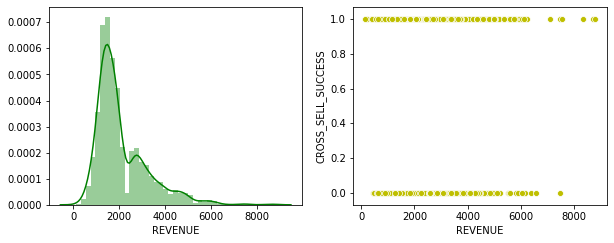

In [9]:
##########################
# Visual Histogram REVENUE
##########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')


############################
# Visual Scatterplot REVENUE
############################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['REVENUE'],
                y = chefdf['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('REVENUE')

########################

From observations of the histogram it was decided to place an outlier threshold 'REVENUE_hi' at 4500.

**Setting outlier thresholds will be performed in the code below.**

**Following assumptions and actions were made:**

CONTACTS_W_CUSTOMER_SERVICE has two particular groupings shaped as normal distributions. The first grouping, by far the    biggest, was considered for this project. Optional extra analysis would be including the second grouping.

MOBILE_NUMBER is binary and will be used entirely for the model.
CANCELLATIONS_BEFORE_NOON has four categories; zero, one , two and three. This variable will be used entirely for this model.
CANCELLATIONS_AFTER_NOON has four categories; zero, one , two and three This variable will be used entirely for this model.
TASTES_AND_PREFERENCES is binary and shall be used entirely.
MOBILE_LOGINS four categories of which one and two may be more relevant. No outliers were flagged for this variabe.
PC_LOGINS four categories; four,five,six and seven. No outliers were flagged for this variabe. PRODUCT_CATEGORIES_VIEWED wil be used entirely. FOLLOWED_RECOMMENDATIONS_PCT has multiple groupings so the model will cover all of them without thresholds.
PACKAGE_LOCKER and REFRIDGERATED_LOCKER are binary and will be used as a whole for the model without flagged outliers.
MASTER_CLASSES_ATTENDED and TOTAL_PHOTOS_VIEWED were used entirely without flagged outliers.


*The histogram plots that helped discover and pinpoint outliers in a previous project (A1) and are
now regarded as common knowledge. Therefore they will no longer be plotted to save computing power.**

In [10]:
#REVENUE
REVENUE_hi = 4500

#TOTAL_MEALS_ORDERED
TOTAL_MEALS_ORDERED_lo = 30
TOTAL_MEALS_ORDERED_hi = 200

#UNIQUE_MEALS_PURCH
UNIQUE_MEALS_PURCH_lo = 1
UNIQUE_MEALS_PURCH_hi = 9

#CONTACTS_W_CUSTOMER_SERVICE
CONTACTS_W_CUSTOMER_SERVICE_lo = 4.0
CONTACTS_W_CUSTOMER_SERVICE_hi = 8.0

#AVG_TIME_PER_SITE_VISIT
AVG_TIME_PER_SITE_VISIT_lo = 0
AVG_TIME_PER_SITE_VISIT_hi = 200

#WEEKLY_PLAN
WEEKLY_PLAN_lo = 0
WEEKLY_PLAN_hi = 15

#EARLY_DELIVERIES
EARLY_DELIVERIES_lo = 0
EARLY_DELIVERIES_hi = 4 

#LATE_DELIVERIES
LATE_DELIVERIES_lo = 0
LATE_DELIVERIES_hi = 6

#AVG_PREP_VID_TIME
AVG_PREP_VID_TIME_lo = 100
AVG_PREP_VID_TIME_hi = 200

#LARGEST_ORDER_SIZE
LARGEST_ORDER_SIZE_lo = 2
LARGEST_ORDER_SIZE_hi = 6

#MEDIAN_MEAL_RATING
MEDIAN_MEAL_RATING_lo = 2
MEDIAN_MEAL_RATING_hi = 4

#AVG_CLICKS_PER_VISIT
AVG_CLICKS_PER_VISIT_lo = 11
AVG_CLICKS_PER_VISIT_hi = 17

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# Developing features (columns) for outliers

# REVENUE

chefdf['out_REVENUE'] = 0 
condition_hi = chefdf.loc[0:,'out_REVENUE'][chefdf['REVENUE'] > REVENUE_hi]

chefdf['out_REVENUE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_MEALS_ORDERED

chefdf['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chefdf.loc[0:,'out_TOTAL_MEALS_ORDERED'][chefdf['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = chefdf.loc[0:,'out_TOTAL_MEALS_ORDERED'][chefdf['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

chefdf['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE_MEALS_PURCH

chefdf['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = chefdf.loc[0:,'out_UNIQUE_MEALS_PURCH'][chefdf['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = chefdf.loc[0:,'out_UNIQUE_MEALS_PURCH'][chefdf['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

chefdf['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chefdf.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = chefdf.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT

chefdf['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chefdf['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]
condition_lo = chefdf.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chefdf['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_lo]

chefdf['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# WEEKLY_PLAN

chefdf['out_WEEKLY_PLAN'] = 0
condition_hi = chefdf.loc[0:,'out_WEEKLY_PLAN'][chefdf['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]
condition_lo = chefdf.loc[0:,'out_WEEKLY_PLAN'][chefdf['WEEKLY_PLAN'] < WEEKLY_PLAN_lo]

chefdf['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# EARLY_DELIVERIES
chefdf['out_EARLY_DELIVERIES'] = 0
condition_hi = chefdf.loc[0:,'out_EARLY_DELIVERIES'][chefdf['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = chefdf.loc[0:,'out_EARLY_DELIVERIES'][chefdf['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

chefdf['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# LATE_DELIVERIES

chefdf['out_LATE_DELIVERIES'] = 0
condition_hi = chefdf.loc[0:,'out_LATE_DELIVERIES'][chefdf['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]
condition_lo = chefdf.loc[0:,'out_LATE_DELIVERIES'][chefdf['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

chefdf['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_LATE_DELIVERIES'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME

chefdf['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_PREP_VID_TIME'][chefdf['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = chefdf.loc[0:,'out_AVG_PREP_VID_TIME'][chefdf['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

chefdf['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# LARGEST_ORDER_SIZE

chefdf['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chefdf.loc[0:,'out_LARGEST_ORDER_SIZE'][chefdf['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = chefdf.loc[0:,'out_LARGEST_ORDER_SIZE'][chefdf['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

chefdf['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# MEDIAN_MEAL_RATING

chefdf['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = chefdf.loc[0:,'out_MEDIAN_MEAL_RATING'][chefdf['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]
condition_lo = chefdf.loc[0:,'out_MEDIAN_MEAL_RATING'][chefdf['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]

chefdf['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_CLICKS_PER_VISIT

chefdf['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chefdf['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = chefdf.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chefdf['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

chefdf['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

<h3>Feature Engineering: Trend Analysis</h3><br>
Developing trend based features

**Developing thresholds based on observations from scatterplots.**

**Assumptions and actions:**

CROSS_SELL_SUCCESS is binary and used entirely. 
AVG_CLICKS_PER_VISIT is used entirely even though there is a very thin presence of data before 8.
PRODUCT_CATEGORIES_VIEWED is used entirely as there is a continuous trend.
MOBILE_NUMBER this binary variable was used entirely.
TASTES_AND_PREFERENCES is used entirely without thresholds.
MOBILE_LOGINS was used entirely.
PC_LOGINS was used entirely.
EARLY_DELIVERIES was used entirely
PACKAGE_LOCKER this binary variable was used entirely.
REFRIGERATED_LOCKER this binary variable was used entirely.
No thresholds were placed for FOLLOWED_RECOMMENDATIONS_PCT and MASTER_CLASSES_ATTENDED .

*The scatter plots that helped discover and pinpoint outliers in a previous project (A1) and are
now regarded as common knowledge. Therefore they will no longer be plotted to save computing power.**

In [11]:
# Setting trend-based thresholds

change_TOTAL_MEALS_ORDERED_hi            = 250 #Data scatters above this value
change_UNIQUE_MEALS_PURCH_hi             = 9   #Data scatters above this value
change_TOTAL_PHOTOS_VIEWED_hi            = 500 #Data scatters above this value
change_CONTACTS_W_CUSTOMER_SERVICE_hi    = 10  #Start of a downward trend then trend stops to flat line
change_AVG_TIME_PER_SITE_VISIT_hi        = 300 #Data scatters above this value 
change_CANCELLATIONS_BEFORE_NOON_hi      = 8   #Data scatters above this value
change_LATE_DELIVERIES_hi                = 10  #Data scatters above this value
change_AVG_PREP_VID_TIME_hi              = 290 #Data scatters above this value
change_LARGEST_ORDER_SIZE_hi             = 9   #Data scatters above this value
change_AVG_CLICKS_PER_VISIT_hi           = 10  #Starts from 8 to then and then has downward trend

# Change takes place at

change_MOBILE_NUMBER_at                  = 1 # According to graph it has more points present in higher revenue ranges for value = 1
change_TOTAL_PHOTOS_VIEWED_at            = 0 #strong concentration
change_WEEKLY_PLAN_at                    = 0 #High density around zero
change_TOTAL_PHOTOS_VIEWED_at            = 0 #heavy concentration
change_MEDIAN_MEAL_RATING_at             = 4 #discovered through categorical var analysis
change_UNIQUE_MEALS_PURCH_at             = 1 #strong concentration at 1 with some very high values for revenue
change_CANCELLATIONS_AFTER_NOON_at       = 0 #strongly zero inflated with some higher revenue values around zero

**Develop trend based features, using earlier chosen thresholds.**

In [12]:
# Trend-based feature template

# change_TOTAL_MEALS_ORDERED_hi

chefdf['change_TOTAL_MEALS_ORDERED_hi'] = 0
condition = chefdf.loc[0:,'change_TOTAL_MEALS_ORDERED_hi'][chefdf['TOTAL_MEALS_ORDERED'] > change_TOTAL_MEALS_ORDERED_hi]

chefdf['change_TOTAL_MEALS_ORDERED_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# UNIQUE_MEALS_PURCH_hi

chefdf['change_UNIQUE_MEALS_PURCH_hi'] = 0
condition = chefdf.loc[0:,'change_UNIQUE_MEALS_PURCH_hi'][chefdf['UNIQUE_MEALS_PURCH'] > change_UNIQUE_MEALS_PURCH_hi]

chefdf['change_UNIQUE_MEALS_PURCH_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_TOTAL_PHOTOS_VIEWED_hi

chefdf['change_TOTAL_PHOTOS_VIEWED_hi'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_hi'][chefdf['TOTAL_PHOTOS_VIEWED'] > change_TOTAL_PHOTOS_VIEWED_hi]

chefdf['change_TOTAL_PHOTOS_VIEWED_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_CONTACTS_W_CUSTOMER_SERVICE_hi

chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'] = 0
condition = chefdf.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE_hi'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] > change_CONTACTS_W_CUSTOMER_SERVICE_hi]

chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
# change_AVG_TIME_PER_SITE_VISIT_hi

chefdf['change_AVG_TIME_PER_SITE_VISIT_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_TIME_PER_SITE_VISIT_hi'][chefdf['AVG_TIME_PER_SITE_VISIT'] > change_AVG_TIME_PER_SITE_VISIT_hi]

chefdf['change_AVG_TIME_PER_SITE_VISIT_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_CANCELLATIONS_BEFORE_NOON_hi

chefdf['change_CANCELLATIONS_BEFORE_NOON_hi'] = 0
condition = chefdf.loc[0:,'change_CANCELLATIONS_BEFORE_NOON_hi'][chefdf['CANCELLATIONS_BEFORE_NOON'] > change_CANCELLATIONS_BEFORE_NOON_hi]

chefdf['change_CANCELLATIONS_BEFORE_NOON_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_LATE_DELIVERIES_hi

chefdf['change_LATE_DELIVERIES_hi'] = 0
condition = chefdf.loc[0:,'change_LATE_DELIVERIES_hi'][chefdf['LATE_DELIVERIES'] > change_LATE_DELIVERIES_hi]

chefdf['change_LATE_DELIVERIES_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_AVG_PREP_VID_TIME_hi

chefdf['change_AVG_PREP_VID_TIME_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_PREP_VID_TIME_hi'][chefdf['AVG_PREP_VID_TIME'] > change_AVG_PREP_VID_TIME_hi]

chefdf['change_AVG_PREP_VID_TIME_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_LARGEST_ORDER_SIZE_hi

chefdf['change_LARGEST_ORDER_SIZE_hi'] = 0
condition = chefdf.loc[0:,'change_LARGEST_ORDER_SIZE_hi'][chefdf['LARGEST_ORDER_SIZE'] > change_LARGEST_ORDER_SIZE_hi]

chefdf['change_LARGEST_ORDER_SIZE_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_AVG_CLICKS_PER_VISIT_hi

chefdf['change_AVG_CLICKS_PER_VISIT_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_CLICKS_PER_VISIT_hi'][chefdf['AVG_CLICKS_PER_VISIT'] > change_AVG_CLICKS_PER_VISIT_hi]

chefdf['change_AVG_CLICKS_PER_VISIT_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

########################################
## change at threshold                ##
########################################

# change_MOBILE_NUMBER_at

chefdf['change_MOBILE_NUMBER_at'] = 0
condition = chefdf.loc[0:,'change_MOBILE_NUMBER_at'][chefdf['MOBILE_NUMBER'] == change_MOBILE_NUMBER_at ]

chefdf['change_MOBILE_NUMBER_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_TOTAL_PHOTOS_VIEWED_at

chefdf['change_TOTAL_PHOTOS_VIEWED_at'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_at'][chefdf['TOTAL_PHOTOS_VIEWED'] == change_TOTAL_PHOTOS_VIEWED_at ]

chefdf['change_TOTAL_PHOTOS_VIEWED_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# change_WEEKLY_PLAN_change_at

chefdf['change_WEEKLY_PLAN_at'] = 0
condition = chefdf.loc[0:,'change_WEEKLY_PLAN_at'][chefdf['WEEKLY_PLAN'] == change_WEEKLY_PLAN_at ]

chefdf['change_WEEKLY_PLAN_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_TOTAL_PHOTOS_VIEWED_at

chefdf['change_TOTAL_PHOTOS_VIEWED_at'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_at'][chefdf['TOTAL_PHOTOS_VIEWED'] == change_TOTAL_PHOTOS_VIEWED_at ]

chefdf['change_TOTAL_PHOTOS_VIEWED_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
# change_UNIQUE_MEALS_PURCH_at

chefdf['change_UNIQUE_MEALS_PURCH_at'] = 0
condition = chefdf.loc[0:,'change_UNIQUE_MEALS_PURCH_at'][chefdf['UNIQUE_MEALS_PURCH'] == change_UNIQUE_MEALS_PURCH_at ]

chefdf['change_UNIQUE_MEALS_PURCH_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# change_MEDIAN_MEAL_RATING_at

chefdf['change_MEDIAN_MEAL_RATING_at'] = 0
condition = chefdf.loc[0:,'change_MEDIAN_MEAL_RATING_at'][chefdf['MEDIAN_MEAL_RATING'] == change_MEDIAN_MEAL_RATING_at ]

chefdf['change_MEDIAN_MEAL_RATING_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
# change_CANCELLATIONS_AFTER_NOON_at
chefdf['change_CANCELLATIONS_AFTER_NOON_at'] = 0
condition = chefdf.loc[0:,'change_CANCELLATIONS_AFTER_NOON_at'][chefdf['CANCELLATIONS_AFTER_NOON'] == change_CANCELLATIONS_AFTER_NOON_at ]

chefdf['change_CANCELLATIONS_AFTER_NOON_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

**Focused Feature Engineering : EMAIL**

In the former project, email was not used as a variable that could enhance the model due to time constraints. However, this variable has great potential to discover the impact that corporate entities have. In the code below, the email address is being divided.

In [13]:
# Creating a placeholder list
placeholder_lst = []

# Loop over each email address
for index, col in chefdf.iterrows():
    
    # The email is splitted at '@'
    sp_email = chefdf.loc[index, 'EMAIL'].split(sep = "@")
    
    # The results are added to placeholder_lst
    placeholder_lst.append(sp_email)
    
# The placeholder_lst is converted into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


**The data is concatenated with the original chefdf but under a new column name.**

In [14]:
# Renaming column
email_df.columns = ["name" , "personal_email"]

# Concatenating personal_email with friends DataFrame
chefdf = pd.concat([chefdf, email_df.loc[: , "personal_email"]],
                   axis = 1)

# printing value counts of personal_email
chefdf.loc[: ,'personal_email'].value_counts()

chefdf.head()


,REVENUE,CROSS_SELL_SUCCESS,EMAIL,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,out_REVENUE,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,change_TOTAL_MEALS_ORDERED_hi,change_UNIQUE_MEALS_PURCH_hi,change_TOTAL_PHOTOS_VIEWED_hi,change_CONTACTS_W_CUSTOMER_SERVICE_hi,change_AVG_TIME_PER_SITE_VISIT_hi,change_CANCELLATIONS_BEFORE_NOON_hi,change_LATE_DELIVERIES_hi,change_AVG_PREP_VID_TIME_hi,change_LARGEST_ORDER_SIZE_hi,change_AVG_CLICKS_PER_VISIT_hi,change_MOBILE_NUMBER_at,change_TOTAL_PHOTOS_VIEWED_at,change_WEEKLY_PLAN_at,change_UNIQUE_MEALS_PURCH_at,change_MEDIAN_MEAL_RATING_at,change_CANCELLATIONS_AFTER_NOON_at,personal_email
0,1880.0,1,addam.osgrey@passport.com,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,passport.com
1,1495.0,1,aegon.blackfyre@jnj.com,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,jnj.com
2,2572.5,1,aegon.frey.(son.of.aenys)@gmail.com,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,gmail.com
3,1647.0,1,aegon.targaryen.(son.of.rhaegar)@ibm.com,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,ibm.com
4,1923.0,1,aegon.v.targaryen@goldmansacs.com,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,goldmansacs.com


**Following code sorts the emails**

In [15]:
# email domain types

junk_email  = ['@me.com',
    '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

professional_email = ['@mmm.com',
    '@boeing.com', '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com', 
    '@disney.com', '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com', 
    '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com', 
    '@mcdonalds.com', '@merck.com', '@microsoft.com', '@nike.com', 
    '@pfizer.com', '@pg.com', '@travelers.com', '@unitedtech.com', '@unitedhealth.com', 
    '@verizon.com', '@visa.com', '@walmart.com', '@apple.com', '@amex.com']

personal_email = ['@gmail.com', '@yahoo.com', '@protonmail.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chefdf['personal_email']:
        if '@'+ domain in personal_email:
            placeholder_lst.append('personal')
            
        elif '@'+ domain in professional_email:
            placeholder_lst.append('professional')
            
        elif '@'+ domain in junk_email:
            placeholder_lst.append('junk')
            
        else:
            print("Something went wrong, unknown value in mail")


# concatenating with original DataFrame
chefdf['domain_group'] = pd.Series(placeholder_lst)

# checking results
chefdf['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

Personal and professional mails make up for the largest amount of emails. It is observed that professional is over 75% the size of personal emails. This indicates that professional mail addresses are well represented still and both features need further investigation to verify their potential influence.

**One-Hot encoding**

In [16]:
one_hot_mail  = pd.get_dummies(chefdf['domain_group'])

# joining codings together
chefdf = chefdf.join([one_hot_mail])

# checking results
chefdf.columns
chefdf.head()

,REVENUE,CROSS_SELL_SUCCESS,EMAIL,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,out_REVENUE,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,change_TOTAL_MEALS_ORDERED_hi,change_UNIQUE_MEALS_PURCH_hi,change_TOTAL_PHOTOS_VIEWED_hi,change_CONTACTS_W_CUSTOMER_SERVICE_hi,change_AVG_TIME_PER_SITE_VISIT_hi,change_CANCELLATIONS_BEFORE_NOON_hi,change_LATE_DELIVERIES_hi,change_AVG_PREP_VID_TIME_hi,change_LARGEST_ORDER_SIZE_hi,change_AVG_CLICKS_PER_VISIT_hi,change_MOBILE_NUMBER_at,change_TOTAL_PHOTOS_VIEWED_at,change_WEEKLY_PLAN_at,change_UNIQUE_MEALS_PURCH_at,change_MEDIAN_MEAL_RATING_at,change_CANCELLATIONS_AFTER_NOON_at,personal_email,domain_group,junk,personal,professional
0,1880.0,1,addam.osgrey@passport.com,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,passport.com,junk,1,0,0
1,1495.0,1,aegon.blackfyre@jnj.com,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,jnj.com,professional,0,0,1
2,2572.5,1,aegon.frey.(son.of.aenys)@gmail.com,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,gmail.com,personal,0,1,0
3,1647.0,1,aegon.targaryen.(son.of.rhaegar)@ibm.com,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,ibm.com,professional,0,0,1
4,1923.0,1,aegon.v.targaryen@goldmansacs.com,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,goldmansacs.com,professional,0,0,1


**Evaluation of Variables**

Categorical variables may have a severe impact on CROSS_SELL_SUCCESS. Value_counts and boxplots will be used to give an initial view on this impact.

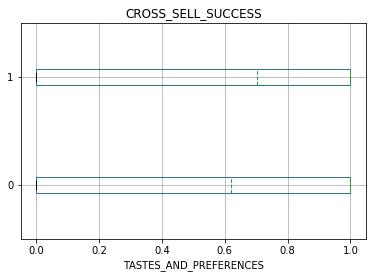

1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

In [17]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'TASTES_AND_PREFERENCES',
					 data     = chefdf)

chefdf['TASTES_AND_PREFERENCES'].value_counts()

**Findings from evaluating categorical variables: TASTES_AND_PREFERENCES**

As we can see the specification of TASTES_AND_PREFERENCES is more common with CROSS_SELL_SUCCESS being one (actual success), this may indicate that customers willing to provide extra details in the form of preferences may also be open to new services such as the 'Halfway There' campaign.

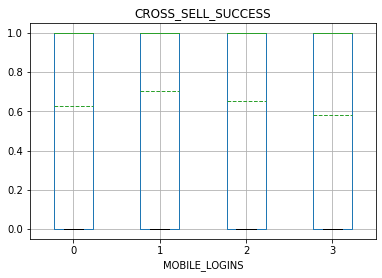

1    999
2    919
0     16
3     12
Name: MOBILE_LOGINS, dtype: int64

In [18]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'MOBILE_LOGINS',
					 data     = chefdf)

chefdf['MOBILE_LOGINS'].value_counts()
 
#MOBILE_LOGINS 1 was best - also captivated biggest group (3 and 0 worst)
#FOLLOWED_RECOMMENDATIONS_PCT - looks like everyone 40 and up contributed to the Cross_sell_succes
#personal, slightly more but not that much more (1 - personal)
##professional - 0.8 over 0.6 more professionals is better
#number_of_names - We can see that anything over 1 name realizes higher cross sell success!
##We can see that having a MOBILE_NUMBER is more related to customer success, there are however a lot more people that have it

**Findings from evaluating categorical variables: MOBILE_LOGINS**

This is the counts of logins on the mobile platform. We can see that zero logins does not mean zero CROSS_SELL_SUCCESS indicating we are not dependent on the mobile platform. However, one login is by far the biggest group and scores the highest median for CROSS_SELL_SUCCESS. This indicates there is a group of customers that know well what they want as they log in only once but do lead to a high median for our success metric. We can not ignore this group.

**Evaluating categorical variables: FOLLOWED_RECOMMENDATIONS_PCT**
    
Percentage of time a customer followed meal recommendations generated displayed on the web or mobile platform


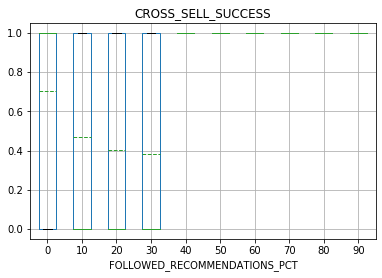

10    404
20    361
30    242
70    190
0     155
60    150
80    142
50    140
40     97
90     65
Name: FOLLOWED_RECOMMENDATIONS_PCT, dtype: int64

In [19]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'FOLLOWED_RECOMMENDATIONS_PCT',
					 data     = chefdf)

chefdf['FOLLOWED_RECOMMENDATIONS_PCT'].value_counts()

**Findings from evaluating categorical variables: FOLLOWED_RECOMMENDATIONS_PCT**

As we can see, customers who do not follow recommendations (0) and those that do (10 and onwards) give us varying data for our CROSS_SELL_SUCCESS metric. This needs to be looked into. If for Followed_RECOMMENDATIONS_PCT 40 and onwards the median really lies at 1.0 (which is hard to confirm visually) then this might be quite an influential metric. However, this is hard to determine and more research is needed in order not to jump to conclusions.


**Evaluating categorical variables: personal**

The personal emails used to subscribe to our services.

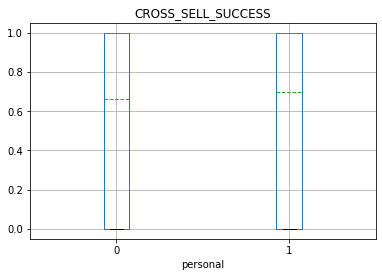

0    1085
1     861
Name: personal, dtype: int64

In [20]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'personal',
					 data     = chefdf)

chefdf['personal'].value_counts()

**Findings from evaluating categorical variables: personal**

The boxplot barely shows a difference in the medians but a personal mail seems to still outperform the inverse of a personal mail (which is the combination of professional and junk mails) when it comes to CROSS_SELL_SUCCESS. It may be worth it to lower the amount of junk mails and focus more on personal and professional mails. This feature may be influential and has shown a first positive sign to be of importance to our model.

**Evaluating categorical variables: professional**

The personal emails used to subscribe to our services.

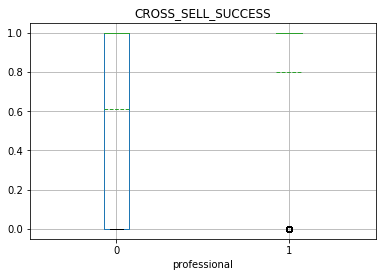

0    1250
1     696
Name: professional, dtype: int64

In [21]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'professional',
					 data     = chefdf)

chefdf['professional'].value_counts()

It becomes clear that, with their median at 0.8, professionals contribute more to our CROSS_SELL_SUCCESS and this group needs to be treated as such. The value counts shows that professionals represent less than a third of all our mail domains which indicates that we need to be more targeted towards professionals when it comes to Halfway There.

**Evaluating categorical variables: number_of_names**

A variable that was created to analyze the relation of our clients, taking into concideration family bonds etc.

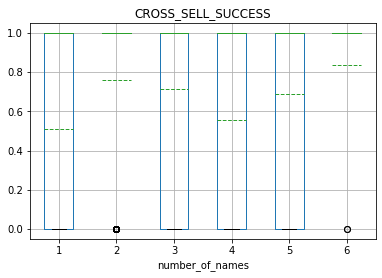

2    1201
1     591
3      98
5      35
6      12
4       9
Name: number_of_names, dtype: int64

In [22]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'number_of_names',
					 data     = chefdf)

chefdf['number_of_names'].value_counts()

**Findings from evaluating categorical variables: number_of_names**

It is observed that names >1 also contribute more to CROSS_SELL_SUCCESS indicating the important of inner client relations and group dynamics such as family. This also highlights that customers that do not bother with filling out their full name being potentially less engaged then those that do. 

**Evaluating categorical variables: mobile_number**

Customer registered with a mobile or landline number (1 = MOBILE, 0 = LANDLINE)

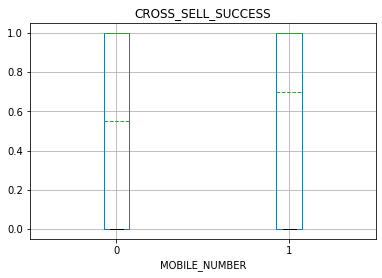

1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64

In [23]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable #y
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = True,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'MOBILE_NUMBER',
					 data     = chefdf)

chefdf['MOBILE_NUMBER'].value_counts()

The majority of our customers have a mobile number (1708). These customers also have a bigger contribution to CROSS_SELL_SUCCESS than those do not have a mobile phone. Obtaining a mobile number from other customers and recommending the Halfway There service to other customers that offered their number may be of interest to the company in order to expand the Halfway There service.

**Dropping the unnecessary variables**

(DOMAIN_GROUP, PERSONAL_EMAIL). "professional" and "personal" will be maintained for further evaluation.

In [24]:
# dropping variables 
chefdf = chefdf.drop(['EMAIL','domain_group', 'personal_email', 
                   'junk'], axis = 1)

<h3>Feature Engineering - Encoding Categorical Data</h3><br>

 The variables which were considered categorical were printed below.

In [25]:
# printing columns
print(f"""

#EMAIL
{chefdf['personal'].value_counts()}
{chefdf['professional'].value_counts()}


#UNIQUE_MEALS_PURCH
{chefdf['UNIQUE_MEALS_PURCH'].value_counts()}

#PACKAGE_LOCKER
{chefdf['PACKAGE_LOCKER'].value_counts()}

#REFRIGERATED_LOCKER
{chefdf['TASTES_AND_PREFERENCES'].value_counts()}

#TASTES_AND_PREFERENCES
{chefdf['TASTES_AND_PREFERENCES'].value_counts()}

#PRODUCT_CATEGORIES_VIEWED
{chefdf['PRODUCT_CATEGORIES_VIEWED'].value_counts()}

#MEDIAN_MEAL_RATING
{chefdf['MEDIAN_MEAL_RATING'].value_counts()}
""")



#EMAIL
0    1085
1     861
Name: personal, dtype: int64
0    1250
1     696
Name: professional, dtype: int64


#UNIQUE_MEALS_PURCH
3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

#PACKAGE_LOCKER
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64

#REFRIGERATED_LOCKER
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

#TASTES_AND_PREFERENCES
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

#PRODUCT_CATEGORIES_VIEWED
2     313
10    287
3     253
7     170
8     166
1     162
5     156
6     153
4     146
9     140
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64

#MEDIAN_MEAL_RATING
3    1087
2     487
4     260
1      99
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64



When evaluating the new variables created for mail (personal and professional), we can observe there are more instances of personal mails. However, professional is still >75% the amount of personal when using value counts.

<h3>Pearson correlation</h3><br>

In [26]:
# creating a (Pearson) correlation matrix
df_corr = chefdf.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False)) #Order to speed up decision making

CROSS_SELL_SUCCESS                       1.00
FOLLOWED_RECOMMENDATIONS_PCT             0.46
professional                             0.19
number_of_names                          0.16
CANCELLATIONS_BEFORE_NOON                0.16
change_MOBILE_NUMBER_at                  0.10
MOBILE_NUMBER                            0.10
TASTES_AND_PREFERENCES                   0.08
REFRIGERATED_LOCKER                      0.07
change_CANCELLATIONS_AFTER_NOON_at       0.05
PACKAGE_LOCKER                           0.04
MASTER_CLASSES_ATTENDED                  0.04
personal                                 0.04
CONTACTS_W_CUSTOMER_SERVICE              0.04
PC_LOGINS                                0.04
AVG_PREP_VID_TIME                        0.03
MEDIAN_MEAL_RATING                       0.03
change_AVG_PREP_VID_TIME_hi              0.03
change_WEEKLY_PLAN_at                    0.02
change_LATE_DELIVERIES_hi                0.02
EARLY_DELIVERIES                         0.02
LARGEST_ORDER_SIZE                

FOLLOWED_RECOMMENDATIONS_PCT proves to be more postively correlated with CROSS_SELL_SUCCESS then other features as it has a correlation of0.46. There are other features such as 'professional' and CANCELLATIONS_BEFORE_NOON which do not have a correlation that is higher than 0.2 Nonetheless, this may be a first indicator that the 'professional' audience has a bigger interest for the Halfway There service.

In [27]:
# Make a copy of the feature rich dataset
chefdf_copy = chefdf.copy()

# The revenue will be dropped from the dataset as it is not relevant for predicting itself.
chefdf_copy = chefdf_copy.drop('CROSS_SELL_SUCCESS', axis = 1)

# Each explanatory variable will be formatted for statsmodels
for val in chefdf_copy:
    print(f"chefdf['{val}'] +")

chefdf['REVENUE'] +
chefdf['TOTAL_MEALS_ORDERED'] +
chefdf['UNIQUE_MEALS_PURCH'] +
chefdf['CONTACTS_W_CUSTOMER_SERVICE'] +
chefdf['PRODUCT_CATEGORIES_VIEWED'] +
chefdf['AVG_TIME_PER_SITE_VISIT'] +
chefdf['MOBILE_NUMBER'] +
chefdf['CANCELLATIONS_BEFORE_NOON'] +
chefdf['CANCELLATIONS_AFTER_NOON'] +
chefdf['TASTES_AND_PREFERENCES'] +
chefdf['PC_LOGINS'] +
chefdf['MOBILE_LOGINS'] +
chefdf['WEEKLY_PLAN'] +
chefdf['EARLY_DELIVERIES'] +
chefdf['LATE_DELIVERIES'] +
chefdf['PACKAGE_LOCKER'] +
chefdf['REFRIGERATED_LOCKER'] +
chefdf['FOLLOWED_RECOMMENDATIONS_PCT'] +
chefdf['AVG_PREP_VID_TIME'] +
chefdf['LARGEST_ORDER_SIZE'] +
chefdf['MASTER_CLASSES_ATTENDED'] +
chefdf['MEDIAN_MEAL_RATING'] +
chefdf['AVG_CLICKS_PER_VISIT'] +
chefdf['TOTAL_PHOTOS_VIEWED'] +
chefdf['number_of_names'] +
chefdf['out_REVENUE'] +
chefdf['out_TOTAL_MEALS_ORDERED'] +
chefdf['out_UNIQUE_MEALS_PURCH'] +
chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chefdf['out_AVG_TIME_PER_SITE_VISIT'] +
chefdf['out_WEEKLY_PLAN'] +
chefdf['ou

<h3> Modelling </h3><br>

The data is prepared and the train test split is performed in the code below.

In [28]:
#Scaling the data

scaling_data = chefdf

# Instantiating StandardScaler()
scaler = StandardScaler()

# Fitting the scaler with the scaled data
scaler.fit(scaling_data)

# Transform our data after fitting it
scaled_data = scaler.transform(scaling_data)

# Converting scaled data into a DataFrame
scaled_data_df = pd.DataFrame(scaled_data)

# Adding labels to the scaled DataFrame
scaled_data_df.columns = scaling_data.columns

# Checking the results
scaled_data_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,number_of_names,out_REVENUE,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_AVG_TIME_PER_SITE_VISIT,out_WEEKLY_PLAN,out_EARLY_DELIVERIES,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,change_TOTAL_MEALS_ORDERED_hi,change_UNIQUE_MEALS_PURCH_hi,change_TOTAL_PHOTOS_VIEWED_hi,change_CONTACTS_W_CUSTOMER_SERVICE_hi,change_AVG_TIME_PER_SITE_VISIT_hi,change_CANCELLATIONS_BEFORE_NOON_hi,change_LATE_DELIVERIES_hi,change_AVG_PREP_VID_TIME_hi,change_LARGEST_ORDER_SIZE_hi,change_AVG_CLICKS_PER_VISIT_hi,change_MOBILE_NUMBER_at,change_TOTAL_PHOTOS_VIEWED_at,change_WEEKLY_PLAN_at,change_UNIQUE_MEALS_PURCH_at,change_MEDIAN_MEAL_RATING_at,change_CANCELLATIONS_AFTER_NOON_at,personal,professional
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59,-1.07,-0.23,-0.46,-0.10,-0.58,-0.19,-0.5,-0.34,-0.34,-0.63,-0.33,-0.25,-0.40,-0.13,-0.10,-0.21,-0.35,-0.09,-0.04,-0.14,-0.10,-0.08,-3.05,-2.68,-1.19,-0.56,-0.31,-0.39,-2.44,-0.89,-0.75
25%,-0.67,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-1.07,-0.23,-0.46,-0.10,-0.58,-0.19,-0.5,-0.34,-0.34,-0.63,-0.33,-0.25,-0.40,-0.13,-0.10,-0.21,-0.35,-0.09,-0.04,-0.14,-0.10,-0.08,0.33,0.37,-1.19,-0.56,-0.31,-0.39,0.41,-0.89,-0.75
50%,-0.32,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.21,-0.23,-0.46,-0.10,-0.58,-0.19,-0.5,-0.34,-0.34,-0.63,-0.33,-0.25,-0.40,-0.13,-0.10,-0.21,-0.35,-0.09,-0.04,-0.14,-0.10,-0.08,0.33,0.37,0.84,-0.56,-0.31,-0.39,0.41,-0.89,-0.75
75%,0.49,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.27,0.64,0.37,0.21,-0.23,-0.46,-0.10,-0.58,-0.19,-0.5,-0.34,-0.34,1.59,-0.33,-0.25,-0.40,-0.13,-0.10,-0.21,-0.35,-0.09,-0.04,-0.14,-0.10,-0.08,0.33,0.37,0.84,-0.56,-0.31,-0.39,0.41,1.12,1.34
max,5.88,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.92,2.35,8.25,5.35,4.39,2.17,10.07,1.74,5.30,2.0,2.94,2.95,1.59,3.06,4.05,2.51,7.61,10.07,4.68,2.83,11.75,25.45,7.39,10.35,12.19,0.33,0.37,0.84,1.78,3.20,2.55,0.41,1.12,1.34


**The response and explanatory variables are being declared and the data is being split into train test groups.**

In [29]:
# Declaring response variable
chefdf_target = chefdf.loc[ : , 'CROSS_SELL_SUCCESS']

# Declaring explanatory variables
chefdf_data = scaled_data_df.drop('CROSS_SELL_SUCCESS', axis = 1)

In [30]:
# Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
            chefdf_data,
            chefdf_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chefdf_target)

# Merge training data for statsmodels
chefdf_train = pd.concat([X_train, y_train], axis = 1)


**Logistic Regression**
Running a full model with all features in it.

In [31]:
# Running a logistic regression
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                    REVENUE +
                                    TOTAL_MEALS_ORDERED +
                                    UNIQUE_MEALS_PURCH +
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    AVG_TIME_PER_SITE_VISIT +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    CANCELLATIONS_AFTER_NOON +
                                    TASTES_AND_PREFERENCES +
                                    PC_LOGINS +
                                    MOBILE_LOGINS +
                                    WEEKLY_PLAN +
                                    EARLY_DELIVERIES +
                                    LATE_DELIVERIES +
                                    PACKAGE_LOCKER +
                                    REFRIGERATED_LOCKER +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    AVG_PREP_VID_TIME +
                                    LARGEST_ORDER_SIZE +
                                    MASTER_CLASSES_ATTENDED +
                                    MEDIAN_MEAL_RATING +
                                    AVG_CLICKS_PER_VISIT +
                                    TOTAL_PHOTOS_VIEWED +
                                    number_of_names +
                                    out_REVENUE +
                                    out_TOTAL_MEALS_ORDERED +
                                    out_UNIQUE_MEALS_PURCH +
                                    out_CONTACTS_W_CUSTOMER_SERVICE +
                                    out_AVG_TIME_PER_SITE_VISIT +
                                    out_WEEKLY_PLAN +
                                    out_EARLY_DELIVERIES +
                                    out_LATE_DELIVERIES +
                                    out_AVG_PREP_VID_TIME +
                                    out_LARGEST_ORDER_SIZE +
                                    out_MEDIAN_MEAL_RATING +
                                    out_AVG_CLICKS_PER_VISIT +
                                    change_TOTAL_MEALS_ORDERED_hi +
                                    change_UNIQUE_MEALS_PURCH_hi +
                                    change_TOTAL_PHOTOS_VIEWED_hi +
                                    change_CONTACTS_W_CUSTOMER_SERVICE_hi +
                                    change_AVG_TIME_PER_SITE_VISIT_hi +
                                    change_CANCELLATIONS_BEFORE_NOON_hi +
                                    change_LATE_DELIVERIES_hi +
                                    change_AVG_PREP_VID_TIME_hi +
                                    change_LARGEST_ORDER_SIZE_hi +
                                    change_AVG_CLICKS_PER_VISIT_hi +
                                    change_MOBILE_NUMBER_at +
                                    change_TOTAL_PHOTOS_VIEWED_at +
                                    change_WEEKLY_PLAN_at +
                                    change_UNIQUE_MEALS_PURCH_at +
                                    change_MEDIAN_MEAL_RATING_at +
                                    change_CANCELLATIONS_AFTER_NOON_at +
                                    personal +
                                    professional """,
                                    data    = chefdf_train)

# fitting the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.407074
         Iterations 7


C:\Users\matth\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\matth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\matth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\matth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1405
Method:                           MLE   Df Model:                           53
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3518
Time:                        16:18:35   Log-Likelihood:                -593.92
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.375e-102
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.4093      0.097     14.503      0.000       1.219       1.600
REVENUE                                  -0.4760      0.173     -2.746      0.006      -0.816      -0.136
TOTAL_MEALS_ORDERED                       0.1762      0.116      1.517      0.129      -0.052       0.404
UNIQUE_MEALS_PURCH                        0.1135      0.089      1.278      0.201      -0.061       0.287
CONTACTS_W_CUSTOMER_SERVICE               0.1584      0.135      1.177      0.239      -0.105       0.422
PRODUCT_CATEGORIES_VIEWED                 0.0044      0.074      0.059      0.953      -0.141       0.149
AVG_TIME_PER_SITE_VISIT                   0.2448      0.138      1.769      0.077      -0.026       0.516
MOBILE_NUMBER                             0.1473        nan        nan        nan         nan         nan
CANCELLATIONS_BEFORE_NOON                 0.4179      0.086      4.888      0.000       0.250       0.585
CANCELLATIONS_AFTER_NOON                 -0.0595      0.198     -0.300      0.764      -0.448       0.329
TASTES_AND_PREFERENCES                    0.1814      0.073      2.497      0.013       0.039       0.324
PC_LOGINS                                 0.0627      0.072      0.868      0.385      -0.079       0.204
MOBILE_LOGINS                            -0.1557      0.073     -2.123      0.034      -0.299      -0.012
WEEKLY_PLAN                              -0.1815      0.112     -1.617      0.106      -0.402       0.039
EARLY_DELIVERIES                          0.1021      0.122      0.839      0.402      -0.136       0.341
LATE_DELIVERIES                           0.1464      0.114      1.280      0.201      -0.078       0.371
PACKAGE_LOCKER                           -0.0831      0.083     -0.996      0.319      -0.246       0.080
REFRIGERATED_LOCKER                       0.1548      0.088      1.769      0.077      -0.017       0.326
FOLLOWED_RECOMMENDATIONS_PCT              1.6363      0.115     14.262      0.000       1.411       1.861
AVG_PREP_VID_TIME                         0.1746      0.180      0.972      0.331      -0.178       0.527
LARGEST_ORDER_SIZE                       -0.0131      0.141     -0.093      0.926      -0.289       0.263
MASTER_CLASSES_ATTENDED                   0.1257      0.088      1.425      0.154      -0.047       0.299
MEDIAN_MEAL_RATING                       -0.2866      0.183     -1.564      0.118      -0.646       0.073
AVG_CLICKS_PER_VISIT                     -0.2399      0.166     -1.448      0.148      -0.565       0.085
TOTAL_PHOTOS_VIEWED                       0.0786      0.171      0.460      0.646      -0.257       0.414
number_of_names                           0.5000      0.084      5.923      0.000       0.335       0.665
out_REVENUE                               0.1205      0.109      1.110      0.267      -0.092       0.333
out_TOTAL_MEALS_ORDERED                  -0.1727      0.133  

MOBILE_NUMBER, change_TOTAL_MEALS_ORDERED_hi and change_MOBILE_NUMBER_at are displayed as nan variables, indicating that these variables which are related to each other may be interfering with our mode. After deleting change_MOBILE_NUMBER_at we could see MOBILE_NUMBER got values other than nan and vice versa. In the end, both features proved to be insignificant and thus they were removed for the following code. change_TOTAL_MEALS_ORDERED_hi has an intercept and was printed to check for null values but was eventually proven to be insignificant and dropped

We could see the model converged (TRUE), which means the data fit the model well.

**Rerun of model wth only the most significant variables**

Following variables were removed:

change_MOBILE_NUMBER_at, out_UNIQUE_MEALS_PURCH, change_CONTACTS_W_CUSTOMER_SERVICE_hi, change_CANCELLATIONS_AFTER_NOON_at, PRODUCT_CATEGORIES_VIEWED, out_CONTACTS_W_CUSTOMER_SERVICE, change_LARGEST_ORDER_SIZE_hi,
LARGEST_ORDER_SIZE, change_AVG_CLICKS_PER_VISIT_hi, out_LATE_DELIVERIES, out_MEDIAN_MEAL_RATING, out_EARLY_DELIVERIES, TOTAL_PHOTOS_VIEWED, LATE_DELIVERIES, change_AVG_TIME_PER_SITE_VISIT_hi, change_AVG_PREP_VID_TIME_hi, change_UNIQUE_MEALS_PURCH_hi, change_TOTAL_MEALS_ORDERED_hi, out_AVG_TIME_PER_SITE_VISIT, change_WEEKLY_PLAN_at, out_LARGEST_ORDER_SIZE, UNIQUE_MEALS_PURCH, MASTER_CLASSES_ATTENDED, AVG_CLICKS_PER_VISIT, out_REVENUE, PACKAGE_LOCKER, change_TOTAL_PHOTOS_VIEWED_at, change_UNIQUE_MEALS_PURCH_at, TOTAL_MEALS_ORDERED, REVENUE, change_TOTAL_PHOTOS_VIEWED_hi,
CONTACTS_W_CUSTOMER_SERVICE, AVG_PREP_VID_TIME, MEDIAN_MEAL_RATING, out_TOTAL_MEALS_ORDERED, PC_LOGINS, change_CANCELLATIONS_BEFORE_NOON_hi, CANCELLATIONS_AFTER_NOON, REFRIGERATED_LOCKER, change_LATE_DELIVERIES_hi, out_AVG_CLICKS_PER_VISIT, AVG_TIME_PER_SITE_VISIT, WEEKLY_PLAN, out_WEEKLY_PLAN, EARLY_DELIVERIES, out_AVG_PREP_VID_TIME, 
change_MEDIAN_MEAL_RATING_at,


In [32]:
# Running a logistic regression
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                    CANCELLATIONS_BEFORE_NOON +
                                    TASTES_AND_PREFERENCES +
                                    MOBILE_LOGINS +
                                    number_of_names +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    personal +
                                    MOBILE_NUMBER+
                                    professional """,
                                    data    = chefdf_train)

# Declaring significant features in a list
significant_dict = {
'log_significant' : ['CANCELLATIONS_BEFORE_NOON',
                   'TASTES_AND_PREFERENCES','MOBILE_NUMBER','MOBILE_LOGINS',
                   'number_of_names', 'FOLLOWED_RECOMMENDATIONS_PCT','personal',
                   'professional']
}
# fitting the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.428222
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3181
Time:                        16:18:35   Log-Likelihood:                -624.78
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.145e-120
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.3156      0.091     14.438      0.000       1.137       1.494
CANCELLATIONS_BEFORE_NOON        0.3689      0.078      4.742      0.000       0.216       0.521
TASTES_AND_PREFERENCES           0.1530      0.069      2.217      0.027       0.018       0.288
MOBILE_LOGINS                   -0.1377      0.069     -1.987      0.047      -0.274      -0.002
number_of_names                  0.4473      0.082      5.486      0.000       0.287       0.607
FOLLOWED_RECOMMENDATIONS_PCT     1.5205      0.107     14.148      0.000       1.310       1.731
personal                         0.6490      0.090      7.237      0.000       0.473       0.825
MOBILE_NUMBER                    0.2436      0.068      3.594      0.000       0.111       0.376
professional                     0.9549      0.095     10.075      0.000       0.769       1.141
================================================================================================
"""

**Logistic regression with all features**

In [33]:
# Instantiate logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)

# Fitting training data
logreg_fit = logreg.fit(X_train, y_train)

# Predicting on testing set
logreg_pred = logreg_fit.predict(X_test)

# Print the scored training and testing accuracy along with area under the curve
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(3))
print('AUC Score:', roc_auc_score(y_true  = y_test,
                              y_score = logreg_pred).round(3))

Training ACCURACY: 0.786
Testing  ACCURACY: 0.741
AUC Score: 0.701


**Logistic model with only the significant features**

First a train-test split is performed utilizing the significant variables, afterwards a logistic regression model is created.

In [34]:
# train/test split with the full model
chefdf_data   =  chefdf.loc[ : , significant_dict["log_significant"]]
chefdf_target =  chefdf.loc[ : , "CROSS_SELL_SUCCESS"]


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chefdf_data,
            chefdf_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = chefdf_target)

In [35]:
# Instantiate logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)

# Fitting training data
logreg_fit = logreg.fit(X_train, y_train)

# Predicting on testing set
logreg_pred = logreg_fit.predict(X_test)

# Print the scored training and testing accuracy along with area under the curve
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(3))
print('AUC Score:', roc_auc_score(y_true  = y_test,
                              y_score = logreg_pred).round(3))

Training ACCURACY: 0.788
Testing  ACCURACY: 0.745
AUC Score: 0.703


C:\Users\matth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**KNeighbors model can also be used as classifier instead as regressor**

We instantiate, fit, predict and score as with evey model.

In [36]:
# Instantiating KNN classifier model
knn_reg = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = 26)

# Fitting to training data
knn_reg.fit(X_train, y_train)

# Predicitng
knn_reg_pred = knn_reg.predict(X_test)
knn_auc = roc_auc_score(y_true  = y_test,
                              y_score = knn_reg_pred).round(3)

# Scoring and printing the results
print('Training Score:', knn_reg.score(X_train, y_train).round(3))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(3))
print(f'AUC: {knn_auc}')

# Saving scoring data
knn_reg_score_train = knn_reg.score(X_train, y_train).round(3)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(3)

Training Score: 0.831
Testing Score: 0.786
AUC: 0.755


KNeighbors delivers healthy results as both training and test scores are within 0.05 of each other. The Area Under the Curve is 0.7548 which shows that this particular model outperforms the standard logistic model by every metric we are currently using.

**Classifier tree model**

We instantiate, fit, predict and score as with evey model.

In [37]:
# Instantiating a classification tree model
tree = DecisionTreeClassifier()

# Fitting training data
tree_fit = tree.fit(X_train, y_train)

# Predicitng
tree_pred = tree_fit.predict(X_test)

# Scoring and printing model results
print('Training ACCURACY:', tree_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', tree_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(3))

Training ACCURACY: 0.914
Testing  ACCURACY: 0.766
AUC Score        : 0.748


The training data differs from the testing data by more than the allowed 0.05. 
This means that in this case the model is overfitting as it is the training data that has bigger accuracy by >0.05.
In this case the model picks up noise in the training data and learns it as it conceptualizes the model. In reality these newly learned concepts do not apply to the new data and the model becomes less able to generalize. This means the model is less capable to handle new data properly.

Even though the training accuracy is better then that of the KNeigbor classifier model, the classifier model tree is overfitting which still makes the KNeighbor Clasifier model preferable.

**Gradient Boosting Classifier Model**

We instantiate, fit, predict and score as with evey model.

In [38]:
# Instantiating a GradientBoostingClassifier model
gbm_default = GradientBoostingClassifier(random_state  = 222)

# Fitting training data
gbm_default_fit = gbm_default.fit(X_train, y_train)


# Predicitng on test set
gbm_default_pred = gbm_default_fit.predict(X_test)


# Scoring and printing model results
print('Training ACCURACY:', gbm_default_fit.score(X_train, y_train).round(3))
print('Testing ACCURACY :', gbm_default_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_default_pred).round(3))

Training ACCURACY: 0.851
Testing ACCURACY : 0.817
AUC Score        : 0.783


The Gradient Boosting Classifier model is superior to all previous models as it recieves higher Training and Testing accuracy while not being over-or underfitted in combination with the largest Area Under The Curve.

**Confusion matrix**

Need to COMMENT

In [39]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 91  65]
 [ 59 272]]


Conclusion:

**Visualized Confusion Matrix**

First we initialize the function needed to visualize the confusion matrix, then we call it with the appropriate variables.

In [40]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 222
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

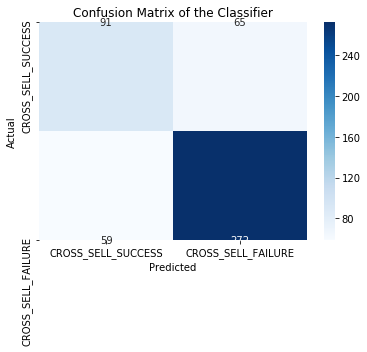

In [41]:
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['CROSS_SELL_SUCCESS', 'CROSS_SELL_FAILURE'])

The Confusion Matrix enhances understanding of model performance through:

True Positive: These are the correct predictions we are interested in (success); 91 for CROSS_SELL_SUCCESS 

True Negative: These are the correct predictions we are not interested in (failure); 272 for CROSS_SELL_SUCCESS

False Negative: Incorrectly predicted not to be in class of interest, we have to be mindful of this; 65 for CROSS_SELL_SUCCESS

False Positive: Incorrectly predicted to be in class of interest, we have to be mindful of this; 59 for CROSS_SELL_SUCCESS

**Decision Tree**

In [42]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Training ACCURACY: 0.822
Testing  ACCURACY: 0.784
AUC Score        : 0.731


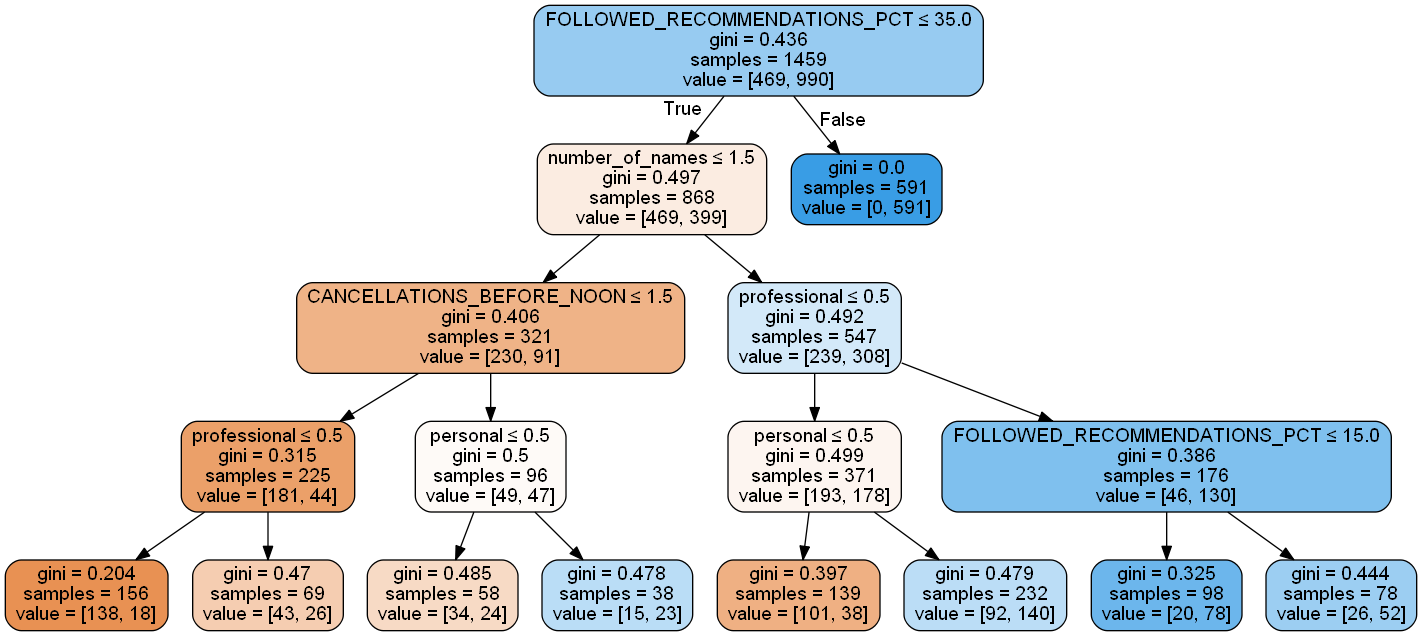

In [43]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(3))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

We can see that Followed_RECOMMENDATIONS, number_of_names and professional are dominant in the first 3 layers of the tree.

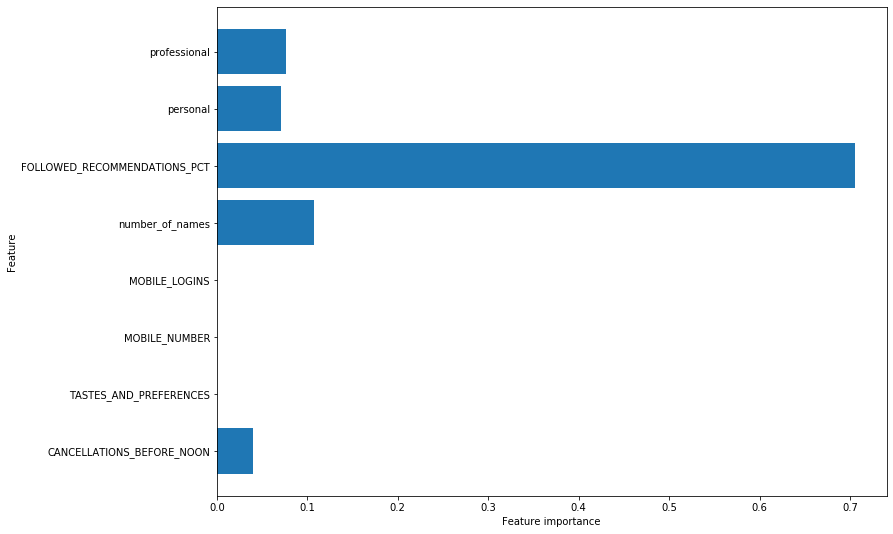

In [44]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

**Feature Importance**

professional and personal prove to be important as which was suspected earlier in our analysis and now proven to be relevant. What is even more impressive is the importance of FOLLOWED_RECOMMENDATIONS_PCT, this can not be ignored for any model that researches this subject. The interdynamics of customer groups that is discovered through the newly created variable: number_of_names'. Finally there is CANCELLATIONS_BEFORE_NOON which is a surprising feature for success and the reason behind it should be looked into, potentially with external research.

**Conclusion:**

The Gradient Boosting Classifier Model outperformed all other models by having an AUC of 0.7825 in combination of a Training and Testing Accuracy respectively of 0.851 and 0.817.